In [1]:
#Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X=data.iloc[:,3:13]
y=data.iloc[:,-1]

In [4]:
Geography=pd.get_dummies(X['Geography'],drop_first=True)
Gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
X=pd.concat([X,Geography,Gender],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [9]:
#Importing required Keras Libraries
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
#Initializing the ANN
classifier=Sequential()

In [11]:
#Input and hidden layer 1
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [12]:
# Hidden layer 2
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))

In [13]:
# Hidden layer 3
classifier.add(Dense(units=15, kernel_initializer='he_uniform',activation='relu'))

In [14]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

In [15]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 16s 3ms/step - loss: 0.5881 - accuracy: 0.7780 - val_loss: 0.4962 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.7979 - val_loss: 0.4758 - val_accuracy: 0.7986
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.8091 - val_loss: 0.4603 - val_accuracy: 0.7993
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.8018 - val_loss: 0.4538 - val_accuracy: 0.8031
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0.8101 - val_loss: 0.4471 - val_accuracy: 0.8050
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8157 - val_loss: 0.4431 - val_accuracy: 0.8065
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4357 - accuracy: 0.8035 - val_loss: 0.4388 - val_accuracy: 0.806

In [17]:
 print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


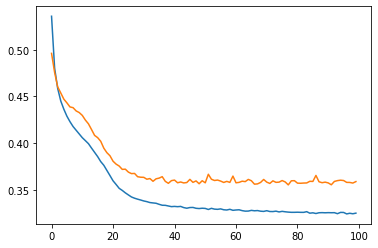

In [18]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
y_pred=(y_pred>0.5)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1542,   53],
       [ 225,  180]])

In [22]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.861